<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/3_7_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.7 Neural Networks**

##**3.7.1 Mathematical Formulation**
x$_{1}$ and x$_{2}$ are inputs from the left and a forecast output on the right, $\hat{y}$, which is modified by the activation function σ(z) chosen in advance.

\begin{align}
\hat{y} = σ(z)=σ(w_{1}a_{1} + w_{2}a_{2}+b).
\end{align}

In neural networks, the weights, the $w_{i}$, and the bias, *b*, will be found numerically in order to best fit our forecast output with our given data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [7]:
# Create test data
X = np.array([[1,0],[1,-1],[0,1]])
y = np.array([1, 1, 0])

In [6]:
# Step 1: Initialize Parameters
def initialize_parameters(layer_dim):
  np.random.seed(100)
  parameters = {}
  Length = len(layer_dim)

  for i in range(1, Length):
    parameters['w'+str(i)] = np.random.rand(layer_dim[i], layer_dim[i-1])*0.1
    parameters['b'+str(i)] = np.zeros((layer_dim[i],1))

  return parameters

# Test
test_parameters = initialize_parameters([2,2,1])
print(test_parameters)

{'w1': array([[0.05434049, 0.02783694],
       [0.04245176, 0.08447761]]), 'b1': array([[0.],
       [0.]]), 'w2': array([[0.00047189, 0.01215691]]), 'b2': array([[0.]])}


In [8]:
# Step 2: Forward propagation
def sigmoid(x):
  return(1/(1+np.exp(-x)))

def relu(x):
  return(np.maximum(0,x))

def single_layer_forward_propagation(x, w_cur, b_cur, activation):
  # Step 1: Apply linear combination
  z = np.dot(w_cur, x)+ b_cur
  # Step 2: Apply activation function
  if activation is 'relu':
    a = relu(z)
  elif activation is 'sigmoid':
    a = sigmoid(z)
  else:
    raise Exception('Not supported activation function')

  return z,a

# Test
test_z,test_a=single_layer_forward_propagation(np.transpose(X),test_parameters['w1'],test_parameters['b1'],'relu')
print(test_z)
print(test_a)

def full_forward_propagation(x,parameters):
    # Save z, a at each step, which will be used for backpropagation
    caches = {}
    caches['a0']=X.T

    A_prev=x
    Length=len(parameters)//2

     # For 1 to N-1 layers, apply relu activation function
    for i in range(1,Length):
      z, a = single_layer_forward_propagation(A_prev,parameters['w'+str(i)],parameters['b'+str(i)],'relu')
      caches['z' + str(i)] = z
      caches['a' + str(i)] = a
      A_prev = a

    # For last layer, apply sigmoid activation function
    z, AL = single_layer_forward_propagation(a,parameters['w'+str(Length)],parameters['b'+str(Length)],'sigmoid')
    caches['z' + str(Length)] = z
    caches['a' + str(Length)] = AL

    return AL, caches

# Test
test_AL,caches=full_forward_propagation(X.T,test_parameters)
print(test_AL)

[[ 0.05434049  0.02650356  0.02783694]
 [ 0.04245176 -0.04202585  0.08447761]]
[[0.05434049 0.02650356 0.02783694]
 [0.04245176 0.         0.08447761]]
[[0.50013543 0.50000313 0.50026003]]


<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-8-9e4e5af0cc4a>:12: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if activation is 'relu':
<ipython-input-8-9e4e5af0cc4a>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif activation is 'sigmoid':


##**3.7.2 Activation Functions**

**3.7.2.1 Step Function**

\begin{align}
σ(x) = \left\{
\begin{array}{cl}
0, & x \le 0 \\
1, & x \ge 0
\end{array}
\right.
\end{align}

In [10]:
def binaryStep(x):
  return np.heaviside(x,1)

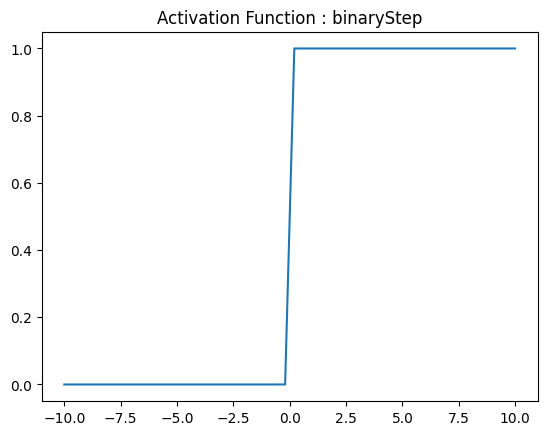

In [11]:
x = np.linspace(-10,10)
plt.plot(x, binaryStep(x))
plt.axis('tight')
plt.title('Activation Function : binaryStep')
plt.show()

**3.7.2.2 ReLU function**
\begin{align}
σ(x) = \text{max}(0,x)
\end{align}

In [12]:
def RELU(x):
  x1 = []
  for i in x:
    if i<0:
      x1.append(0)
    else:
      x1.append(i)

  return x1

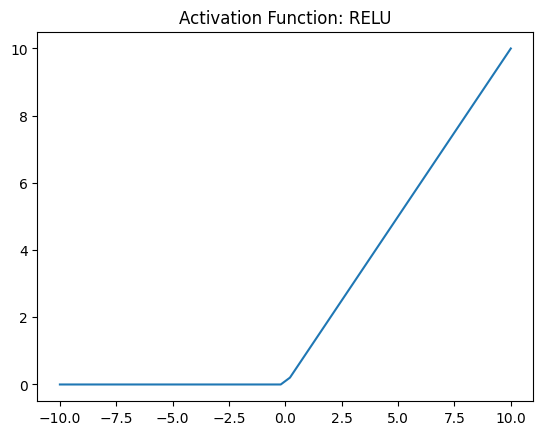

In [13]:
x = np.linspace(-10, 10)
plt.plot(x, RELU(x))
plt.axis('tight')
plt.title("Activation Function: RELU")
plt.show()

**3.7.2.3 Sigmoid**
\begin{align}
σ(x)= \frac{1}{1+e^{-x}}
\end{align}

In [14]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

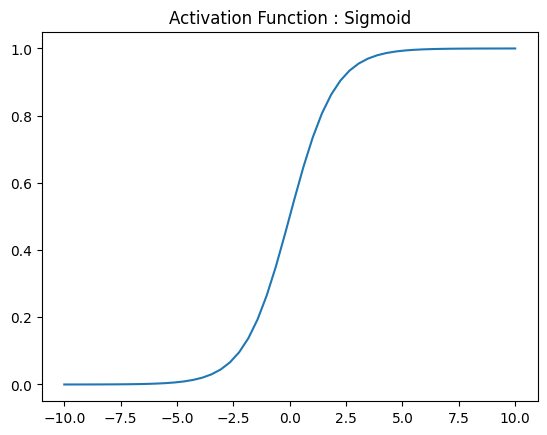

In [15]:
x = np.linspace(-10,10)
plt.plot(x, sigmoid(x))
plt.axis('tight')
plt.title('Activation Function : Sigmoid')
plt.show()

**3.7.2.4 Softmax Function**
\begin{align}
σ(x) = \frac{e^{z_k}}{∑_{k=1}^{K}e^{z_k}}
\end{align}

In [16]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

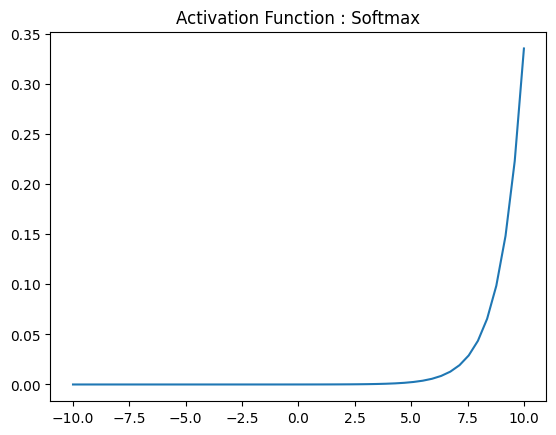

In [18]:
x = np.linspace(-10,10)
plt.plot(x, softmax(x))
plt.axis('tight')
plt.title('Activation Function : Softmax')
plt.show()

##**3.7.3 Cost Function**

We define cost function as
\begin{align}
J= \frac{1}{2}∑_{n=1}^{N}∑_{K=1}^{K}(\hat{y}_k^{(n)}-y_{k}^{(n)})^2
\end{align}

For a binary classification (y$^(n)$ = 0,1), the cost function is
\begin{align}
J = -∑_{n=1}^{N}(y^{(n)}ln(\hat{y}^{(n)})+(1-y^{(n)})ln(1-\hat{y}^{(n)}))
\end{align}
This is related to the cross entropy function.

In [19]:
def cost_function(AL,y):
    m=AL.shape[1]
    cost = (-1/m) * np.sum(np.multiply(y,np.log(AL)) + np.multiply((1-y),np.log(1-AL)))
    # Make sure cost is a scalar
    cost = np.squeeze(cost)

    return cost

# Test
test_cost=cost_function(test_AL,y)
print(test_cost)

def convert_prob_into_class(AL):
    pred = np.copy(AL)
    pred[AL > 0.5]  = 1
    pred[AL <= 0.5] = 0
    return pred

def get_accuracy(AL, Y):
    pred = convert_prob_into_class(AL)
    return (pred == Y).all(axis=0).mean()

# Test
test_y_hat=convert_prob_into_class(test_AL)
test_accuracy = get_accuracy(test_AL,y)

0.6932282197582498


##**3.7.4 Backpropagation**
Here we focus the layer *l* and node *j'* and node *j* from layer *l* - 1.

\begin{align}
\frac{∂J}{∂w_{j,j'}^{(l)}} \text{ and } \frac{∂J}{∂b_{j'}^{(l)}}
\end{align}

In [20]:
# Step 4: Backward Propagation
def sigmoid_backward_propagation(dA,z):
    sig=sigmoid(z)
    dz = dA * sig * (1-sig)
    return dz

def relu_backward_propagation(dA,z):
    dz = np.array(dA,copy=True)
    dz[z<=0]=0
    return dz


def single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,activation):
    #Number of example
    m=A_prev.shape[1]

    # Part 1: Derivative for activation function
    # Select activation function
    if activation is 'sigmoid':
        backward_activation_func = sigmoid_backward_propagation
    elif activation is 'relu':
        backward_activation_func = relu_backward_propagation
    else:
        raise Exception ('Not supported activation function')
    # calculate derivative
    dz_cur = backward_activation_func(dA_cur,z_cur)

    # Part 2: Derivative for linear combination
    dw_cur = np.dot(dz_cur,A_prev.T)/m
    db_cur = np.sum(dz_cur,axis=1,keepdims=True)/m
    dA_prev = np.dot(w_cur.T,dz_cur)

    return dA_prev, dw_cur, db_cur
# Test
dA_cur = - (np.divide(y,test_AL) - np.divide((1-y),(1-test_AL)))
dA_prev,dw_cur,db_cur=single_layer_backward_propagation(dA_cur,test_parameters['w2'],test_parameters['b2'], caches['z2'],caches['a1'],'sigmoid')

print(dw_cur)
print(db_cur)
print(dA_prev)

def full_backward_propagation(AL,y,caches,parameters):

    grads={}
    Length = len(caches)//2
    m = AL.shape[1]
    y = y.reshape(AL.shape)

    # Step 1: Derivative for cost function
    dA_cur = - (np.divide(y,AL) - np.divide((1-y),(1-AL)))

    # Step 2: Sigmoid backward propagation for N layer
    w_cur = parameters['w'+str(Length)]
    b_cur = parameters['b'+str(Length)]
    z_cur = caches['z'+str(Length)]
    A_prev = caches['a'+str(Length-1)]

    dA_prev, dw_cur, db_cur = single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,'sigmoid')

    grads['dw'+str(Length)] = dw_cur
    grads['db'+str(Length)] = db_cur

    # Step 3: relu backward propagation for 1:(N-1) layer
    for i in reversed(range(1,Length)):
        dA_cur = dA_prev
        w_cur  = parameters['w'+str(i)]
        b_cur  = parameters['b'+str(i)]
        z_cur  = caches['z'+str(i)]
        A_prev = caches['a'+str(i-1)]

        dA_prev, dw_cur, db_cur = single_layer_backward_propagation(dA_cur,w_cur,b_cur,z_cur,A_prev,'relu')

        grads['dw'+str(i)]=dw_cur
        grads['db'+str(i)]=db_cur

    return grads

# Test
test_grads=full_backward_propagation(test_AL,y,caches,test_parameters)
print(test_grads['dw2'])
print(test_grads['db2'])
print(test_grads['dw1'])
print(test_grads['db1'])

[[-0.00882962  0.00701355]]
[[-0.1665338]]
[[-0.00023588 -0.00023594  0.00023607]
 [-0.00607681 -0.00607842  0.00608162]]
[[-0.00882962  0.00701355]]
[[-0.1665338]]
[[-0.00015727  0.00015734]
 [-0.0020256   0.00202721]]
[[-7.85849071e-05]
 [ 1.60253171e-06]]


<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-20-6aad5ea4857c>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if activation is 'sigmoid':
<ipython-input-20-6aad5ea4857c>:21: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif activation is 'relu':


##**3.7.5 Backpropagation Algorithm**
From above analysis, we can easily derive the backpragation algorithm as follows.

In [21]:
# Step 5 Update parameters
def update_parameters(parameters,grads,learning_rate):
    Length = len(parameters)//2

    for i in (range(1,Length+1)):
        parameters['w'+str(i)] -= grads['dw'+str(i)] * learning_rate
        parameters['b'+str(i)] -= grads['db'+str(i)] * learning_rate

    return parameters

# test
test_parameters_update = update_parameters(test_parameters,test_grads,1)
print(test_parameters_update['w1'])
print(test_parameters_update['b1'])
print(test_parameters_update['w2'])
print(test_parameters_update['b2'])

[[0.05449777 0.0276796 ]
 [0.04447736 0.08245041]]
[[ 7.85849071e-05]
 [-1.60253171e-06]]
[[0.00930151 0.00514336]]
[[0.1665338]]


In [22]:
# Step 6: Train Nerual Network Model
def train_model(X,y,epoch,layer_dim,learning_rate):
    # Store historical cost
    cost_history = []
    accuracy_history = []
    epoches=[]
    # Step 1: Initialize parameters
    parameters = initialize_parameters(layer_dim)

    for i in range(1,epoch):
        # Step 2: Forward propagation
        AL, caches = full_forward_propagation(X,parameters)

        # Step 3: Calculate and store cost
        cost = cost_function(AL,y)
        cost_history.append(cost)

        accuracy =get_accuracy(AL,y)
        accuracy_history.append(accuracy)

        epoches.append(i)
        # Step 4: Backward propagation
        grads = full_backward_propagation(AL,y,caches,parameters)

        # Step 5: Update parameters
        parameters = update_parameters(parameters,grads,learning_rate)

        if(i % 100 ==0):
            print('i='+str(i)+' cost = ' + str(cost))
            print('i='+str(i)+' accuracy = '+str(accuracy))
            #print(parameters)

    return parameters,cost_history, accuracy_history, epoches

In [23]:
# Create Random Dataset
from sklearn.datasets import make_moons
N_SAMPLES = 1000
X, y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)

# Run Algorithm
test_parameters,test_cost,test_accuracy,test_epoches=train_model(X.T, y, 10000, [2,25,100,100,10,1],0.01)

i=100 cost = 0.5745440931383649
i=100 accuracy = 0.738
i=200 cost = 0.49035972622506596
i=200 accuracy = 0.816
i=300 cost = 0.4377042951884206
i=300 accuracy = 0.858
i=400 cost = 0.40313941120947905
i=400 accuracy = 0.875
i=500 cost = 0.3800620082662189
i=500 accuracy = 0.883
i=600 cost = 0.3616066368781873
i=600 accuracy = 0.892
i=700 cost = 0.34649405566149943
i=700 accuracy = 0.894
i=800 cost = 0.3343413957671847
i=800 accuracy = 0.897
i=900 cost = 0.3243314125459393
i=900 accuracy = 0.897
i=1000 cost = 0.3160541455456967
i=1000 accuracy = 0.896
i=1100 cost = 0.3090622462937729
i=1100 accuracy = 0.894
i=1200 cost = 0.30317733922129925
i=1200 accuracy = 0.896
i=1300 cost = 0.2981818975317995
i=1300 accuracy = 0.895
i=1400 cost = 0.2939577006248745
i=1400 accuracy = 0.894
i=1500 cost = 0.29027661752611605
i=1500 accuracy = 0.894
i=1600 cost = 0.28693971289600895
i=1600 accuracy = 0.895
i=1700 cost = 0.2840167306242856
i=1700 accuracy = 0.895
i=1800 cost = 0.2808174153160521
i=1800 acc

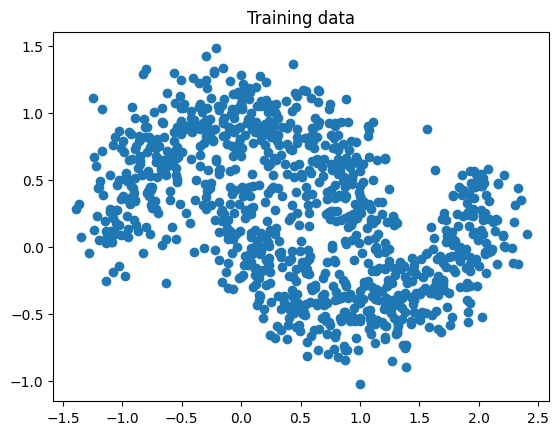

In [24]:
a = [row[0] for row in X]
b = [row[1] for row in X]
plt.scatter(a, b)
plt.axis('tight')
plt.title('Training data')
plt.show()


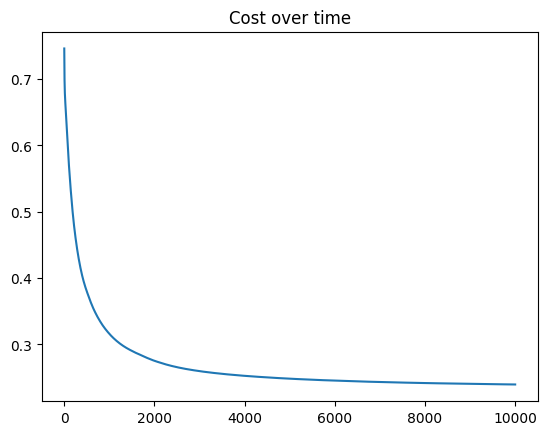

In [25]:
x = np.linspace(0,10000,num=9999)
plt.plot(x, test_cost)
plt.axis('tight')
plt.title('Cost over time')
plt.show()

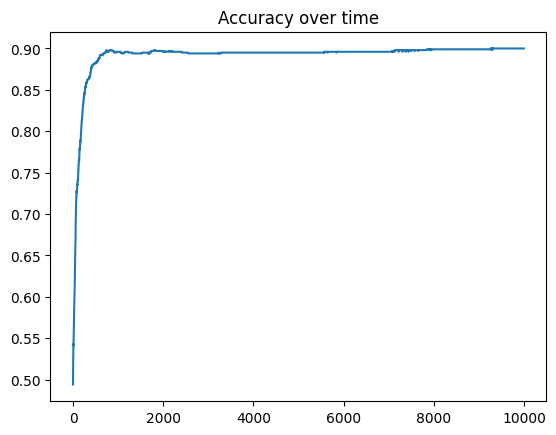

In [26]:
plt.plot(x, test_accuracy)
plt.axis('tight')
plt.title('Accuracy over time')
plt.show()